Hierarchical Clustering - Agglomerative

In [1]:
import numpy as np 
import pandas as pd
from scipy import ndimage 
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 
from matplotlib import pyplot as plt 
from sklearn import manifold, datasets 
from sklearn.cluster import AgglomerativeClustering 
from sklearn.datasets.samples_generator import make_blobs 
%matplotlib inline

In [2]:
#Generating random data using make_blobs

X1, Y1 = make_blobs(n_samples=50, centers = [[2,7],[-4,6],[1,8],[6,8]], cluster_std = 0.9)

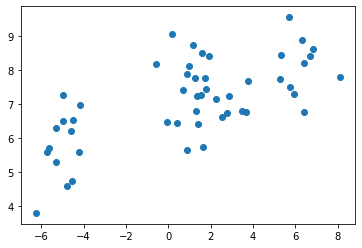

In [4]:
#Scattering data
plt.scatter(X1[:,0],X1[:,1], marker='o')

In [6]:
#Agglomerative clustering

agglom = AgglomerativeClustering(n_clusters = 4, linkage = 'average')

In [7]:
agglom.fit(X1,Y1)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='average', memory=None, n_clusters=4,
                        pooling_func='deprecated')

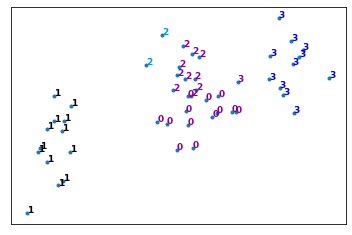

In [9]:
#Plotting the model

# Create a figure of size 6 inches by 4 inches.
plt.figure(figsize=(6,4))

# These two lines of code are used to scale the data points down,
# Or else the data points will be scattered very far apart.

# Create a minimum and maximum range of X1.
x_min, x_max = np.min(X1, axis=0), np.max(X1, axis=0)

# Get the average distance for X1.
X1 = (X1 - x_min) / (x_max - x_min)

# This loop displays all of the datapoints.
for i in range(X1.shape[0]):
    # Replace the data points with their respective cluster value 
    # (ex. 0) and is color coded with a colormap (plt.cm.spectral)
    plt.text(X1[i, 0], X1[i, 1], str(Y1[i]),
             color=plt.cm.nipy_spectral(agglom.labels_[i] / 10.),
             fontdict={'weight': 'bold', 'size': 9})
    
# Remove the x ticks, y ticks, x and y axis
plt.xticks([])
plt.yticks([])
#plt.axis('off')



# Display the plot of the original data before clustering
plt.scatter(X1[:, 0], X1[:, 1], marker='.')
# Display the plot
plt.show()

In [10]:
#Finding the distance matrix
dist_matrix = distance_matrix(X1,X1) 
print(dist_matrix)

[[0.         0.13080254 0.27199493 ... 0.51980081 0.79831619 0.49188749]
 [0.13080254 0.         0.1620745  ... 0.55340524 0.761704   0.40284563]
 [0.27199493 0.1620745  0.         ... 0.70395916 0.85911949 0.45313605]
 ...
 [0.51980081 0.55340524 0.70395916 ... 0.         0.42479008 0.48168372]
 [0.79831619 0.761704   0.85911949 ... 0.42479008 0.         0.4307218 ]
 [0.49188749 0.40284563 0.45313605 ... 0.48168372 0.4307218  0.        ]]


C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  


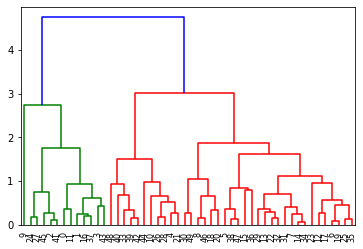

In [11]:
#Plotting the dendrogram
Z = hierarchy.linkage(dist_matrix, 'complete')
dendro = hierarchy.dendrogram(Z)